In [1]:
import os
import pandas as pd

In [4]:
df = pd.read_csv("veribilgisi.csv", delimiter=';', quotechar='"')
# isim formatı şöyle: Kategori1_10001_RCC.dcm veya Kategori5Sol_12719_LMLO.dcm

In [3]:
df

KATEGORİ  HASTA ID DOSYA ADI ETİKET ADI  \
0     Kategori1(Heriki)     10001   RCC.dcm     Normal   
1     Kategori1(Heriki)     10001  RMLO.dcm     Normal   
2     Kategori1(Heriki)     10002   LCC.dcm     Normal   
3     Kategori1(Heriki)     10002  LMLO.dcm     Normal   
4     Kategori1(Heriki)     10003   RCC.dcm     Normal   
...                 ...       ...       ...        ...   
7009       Kategori5Sol     12719  LMLO.dcm      Kitle   
7010       Kategori5Sol     12720   LCC.dcm      Kitle   
7011       Kategori5Sol     12720  LMLO.dcm      Kitle   
7012       Kategori5Sol     12721   LCC.dcm      Kitle   
7013       Kategori5Sol     12721  LMLO.dcm      Kitle   

                                   ETİKET KOORDİNATLARI  
0                                                   NaN  
1                                                   NaN  
2                                                   NaN  
3                                                   NaN  
4                                                   NaN  
...                                                 ...  
7009  -693.9316,-327.6231;-693.9316,-134.1276;-531.2...  
7010  -727.322,-419.7589;-727.322,-50.79141;-379.371...  
7011  -595.595,-382.3951;-595.595,-64.80284;-289.678...  
7012  -524.7009,-961.3434;-524.7009,-541.2303;-65.25...  
7013  -233.9392,-197.4409;-233.9392,240.3888;225.364...  

[7014 rows x 5 columns]

In [35]:
duplicateIDs=df.groupby("HASTA ID").count().reset_index()[df.groupby("HASTA ID").count().reset_index()["KATEGORİ"]>2]["HASTA ID"]
df[df["HASTA ID"].isin(duplicateIDs)]

KATEGORİ  HASTA ID DOSYA ADI     ETİKET ADI  \
2058  Kategori2Sag     11030   RCC.dcm          Kitle   
2059  Kategori2Sag     11030   RCC.dcm          Kitle   
2060  Kategori2Sag     11030  RMLO.dcm          Kitle   
2061  Kategori2Sag     11030  RMLO.dcm          Kitle   
2070  Kategori2Sag     11035   RCC.dcm          Kitle   
...            ...       ...       ...            ...   
6997  Kategori5Sol     12714  LMLO.dcm          Kitle   
6998  Kategori5Sol     12715   LCC.dcm          Kitle   
6999  Kategori5Sol     12715   LCC.dcm  Kalsifikasyon   
7000  Kategori5Sol     12715  LMLO.dcm          Kitle   
7001  Kategori5Sol     12715  LMLO.dcm  Kalsifikasyon   

                                   ETİKET KOORDİNATLARI  
2058  1008.933,426.8723;1008.933,534.0561;1135.292,5...  
2059  754.5869,-313.4725;754.5869,-177.532;895.3248,...  
2060  670.5146,463.2401;670.5146,646.6982;850.3914,6...  
2061  417.2523,879.4003;417.2523,977.017;522.8369,97...  
2070  1076.134,-753.4612;1076.134,-583.9974;1185.787...  
...                                                 ...  
6997  -1154.868,376.5928;-1154.868,642.725;-766.9151...  
6998  -945.0792,-240.9297;-945.0792,-467.8647;-1181....  
6999  -1160.496,-529.3784;-1160.496,-292.6774;-892.5...  
7000  -944.9445,251.8116;-944.9445,-45.9043;-1183.81...  
7001  -1139.973,-19.39701;-1139.973,206.8085;-847.62...  

[2654 rows x 5 columns]

In [2]:
os.listdir()

['benioku.txt',
 'data_process.ipynb',
 'Kategori1',
 'Kategori2Sag',
 'Kategori2Sol',
 'Kategori4Sag',
 'Kategori4Sol',
 'Kategori5Sag',
 'Kategori5Sol',
 'veribilgisi.csv']

In [42]:
# isim formatı şöyle: Kategori1_10001_RCC.dcm veya Kategori5Sol_12719_LMLO.dcm

# dir="Kategori1"
def transporter(dir):
    if(type(dir)!=str):
        print("Invalid input!")
        return
    for index in os.listdir(dir):
        if(index.find(".")!=-1):
            # print("there is a non folder in "+index)
            continue
        innerPath=os.path.join(dir,index)
        for fileName in os.listdir(innerPath):
            if(fileName.find(".")==-1):
                # print(f"there is a folder in {dir} {index} {fileName}")
                continue
            newDirectory=os.path.join(innerPath,fileName)
            destination=os.path.join(dir,f"{dir}_{index}_{fileName}")
            os.rename(newDirectory,destination)
            print("Transported: ", destination)

In [43]:
kategoriler=['Kategori1',
 'Kategori2Sag',
 'Kategori2Sol',
 'Kategori4Sag',
 'Kategori4Sol',
 'Kategori5Sag',
 'Kategori5Sol']
for kategori in kategoriler:
    transporter(kategori)
    print(kategori,"bitti")

Kategori1  bitti
Kategori2Sag  bitti
Kategori2Sol  bitti
Kategori4Sag  bitti
Kategori4Sol  bitti
Kategori5Sag  bitti
Kategori5Sol  bitti


In [5]:
dir="labels"
for file in os.listdir(dir):
    id=file.split("_")
    if(len(id)==1):
        continue
    id=id[1]
    destination=os.path.join(dir,id)
    os.makedirs(destination,exist_ok=True)
    place=os.path.join(dir,file)
    destinationWithName=os.path.join(destination,file)
    os.rename(place,destinationWithName)

In [9]:
file_list=os.listdir("labels/")

data = [[os.listdir("labels/"+item)[0].split("_")[0],item] for item in file_list]
df_patient = pd.DataFrame(data, columns=['KATEGORİ', 'HASTA ID'])

from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1 ,test_size=0.2756,random_state=41)

for train_indices, test_indices in split.split(df_patient,df_patient[["KATEGORİ"]]):
    strat_train_set=df_patient.loc[train_indices]
    strat_test_set=df_patient.loc[test_indices]
    print("a") #makes sure there is only one yield
strat_test_set

a


KATEGORİ HASTA ID
698      Kategori1    10699
674      Kategori1    10675
2572  Kategori5Sol    12573
1680  Kategori4Sag    11681
2208  Kategori5Sag    12209
...            ...      ...
692      Kategori1    10693
1221  Kategori2Sag    11222
899      Kategori1    10900
2098  Kategori4Sol    12099
959      Kategori1    10960

[750 rows x 2 columns]

In [10]:
# fromDir="pngVer/"
# destination_dir="train/images/"
def transportFiles(fromDir,destination_dir, set):
    os.makedirs(destination_dir,exist_ok=True)
    for index, row in set.iterrows():
        name=row["HASTA ID"]
        newFile=fromDir + name
        try:
            # Construct the full file paths
            source = os.path.join(os.getcwd(), newFile)
            destination = os.path.join(os.getcwd(), destination_dir, name)
            
            # Move the file
            os.rename(source, destination)
            # print(f"Moved {newFile} to {destination_dir}")
        except FileNotFoundError:
        #     # print(f"File {newFile} not found")
            pass
        except Exception as e:
            print(f"Error moving {newFile}: {e}")

In [13]:
dir="test/labels"
for folder in os.listdir(dir):
    if(folder.find(".")==-1):
        infolder=os.path.join(dir,folder)
        for file in os.listdir(infolder):
            os.rename(os.path.join(infolder,file),os.path.join(dir,file))

In [5]:
transportFiles("pngVer/","train/images/",strat_train_set)
transportFiles("pngVer/","test/images/",strat_test_set)


In [11]:
transportFiles("mass_calcification/","train/labels/",strat_train_set)
transportFiles("mass_calcification/","test/labels/",strat_test_set)

In [3]:
strat_test_set

KATEGORİ HASTA ID
698      Kategori1    10699
674      Kategori1    10675
2572  Kategori5Sol    12573
1680  Kategori4Sag    11681
2208  Kategori5Sag    12209
...            ...      ...
692      Kategori1    10693
1221  Kategori2Sag    11222
899      Kategori1    10900
2098  Kategori4Sol    12099
959      Kategori1    10960

[750 rows x 2 columns]

In [7]:
file_list=os.listdir("labels/")
data = [item.split('_') for item in file_list]

# DataFrame oluşturun
df_text = pd.DataFrame(data, columns=['KATEGORİ', 'HASTA ID', 'DOSYA ADI'])
df_text['DOSYA ADI'] = df_text['DOSYA ADI'].str.replace('.txt', '.dcm')
# df_text["KATEGORİ"]=df_text["KATEGORİ"].str.replace("1","1(Heriki)")

df_text

KATEGORİ HASTA ID DOSYA ADI
0        Kategori1    10001   RCC.dcm
1        Kategori1    10001  RMLO.dcm
2        Kategori1    10002   LCC.dcm
3        Kategori1    10002  LMLO.dcm
4        Kategori1    10003   RCC.dcm
...            ...      ...       ...
5436  Kategori5Sol    12719  LMLO.dcm
5437  Kategori5Sol    12720   LCC.dcm
5438  Kategori5Sol    12720  LMLO.dcm
5439  Kategori5Sol    12721   LCC.dcm
5440  Kategori5Sol    12721  LMLO.dcm

[5441 rows x 3 columns]

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1 ,test_size=0.2,random_state=41)

for train_indices, test_indices in split.split(df_text,df_text[["KATEGORİ"]]):
    strat_train_set=df_text.loc[train_indices]
    strat_test_set=df_text.loc[test_indices]
    print("a") #makes sure there is only one yield
strat_train_set

a


KATEGORİ HASTA ID DOSYA ADI
3768  Kategori4Sag    11885  RMLO.dcm
681      Kategori1    10342   RCC.dcm
590      Kategori1    10296  RMLO.dcm
1720     Kategori1    10861  LMLO.dcm
969      Kategori1    10486   RCC.dcm
...            ...      ...       ...
161      Kategori1    10081  LMLO.dcm
3328  Kategori4Sag    11665  RMLO.dcm
1241     Kategori1    10622   RCC.dcm
650      Kategori1    10326  RMLO.dcm
4036  Kategori4Sol    12019  LMLO.dcm

[4352 rows x 3 columns]

In [9]:
split=StratifiedShuffleSplit(n_splits=1 ,test_size=0.2,random_state=41)

for train_indices, test_indices in split.split(strat_train_set,strat_train_set[["KATEGORİ"]]):
    strat_val_set=strat_train_set.reset_index().loc[test_indices]
    strat_train_set=strat_train_set.reset_index().loc[train_indices]
    print("a") #makes sure there is only one yield
strat_train_set

a


index      KATEGORİ HASTA ID DOSYA ADI
1155   5049  Kategori5Sol    12526   LCC.dcm
3905   1610     Kategori1    10806  RMLO.dcm
3486   1319     Kategori1    10661   LCC.dcm
828    1935     Kategori1    10969   RCC.dcm
2213   3255  Kategori2Sol    11629   LCC.dcm
...     ...           ...      ...       ...
3928   4356  Kategori5Sag    12179  RMLO.dcm
216     239     Kategori1    10120  RMLO.dcm
4326   4561  Kategori5Sag    12282   RCC.dcm
1953   5104  Kategori5Sol    12553  LMLO.dcm
2701     64     Kategori1    10033   LCC.dcm

[3481 rows x 4 columns]

In [10]:
strat_val_set

index      KATEGORİ HASTA ID DOSYA ADI
2050    771     Kategori1    10387   RCC.dcm
2194   2194  Kategori2Sag    11098  RMLO.dcm
4080   2401  Kategori2Sag    11202   RCC.dcm
1533   5079  Kategori5Sol    12541   LCC.dcm
2277   4305  Kategori4Sol    12154   LCC.dcm
...     ...           ...      ...       ...
2080   1704     Kategori1    10853  RMLO.dcm
2865   1556     Kategori1    10779  RMLO.dcm
2513   2510  Kategori2Sag    11256  RMLO.dcm
1667   4410  Kategori5Sag    12206  RMLO.dcm
2761   1541     Kategori1    10772   LCC.dcm

[871 rows x 4 columns]

In [11]:
strat_test_set

KATEGORİ HASTA ID DOSYA ADI
3459  Kategori4Sag    11731   RCC.dcm
4259  Kategori4Sol    12131   LCC.dcm
2317  Kategori2Sag    11160   RCC.dcm
1767     Kategori1    10885   RCC.dcm
1259     Kategori1    10631   LCC.dcm
...            ...      ...       ...
3487  Kategori4Sag    11745   RCC.dcm
5289  Kategori5Sol    12646   LCC.dcm
4349  Kategori5Sag    12176   RCC.dcm
4118  Kategori4Sol    12060  LMLO.dcm
1253     Kategori1    10628   RCC.dcm

[1089 rows x 3 columns]

In [22]:
from PIL import Image
classDic={1:0,
          2:1,
          4:2,
          5:3}
for index, row in df.iterrows():
    # Construct the filename from the 'Names' column
    dir=row["KATEGORİ"]
    if(dir=="Kategori1(Heriki)"):
        dir="Kategori1"
    id=row["HASTA ID"]
    imageType=row["DOSYA ADI"][:-4]
    filename = f"{dir}_{id}_{imageType}.png"
    content=""
    if(type(row["ETİKET KOORDİNATLARI"])==str):
        print(row)
        label=classDic[int(row["KATEGORİ"][8])]
        
        image = Image.open("pngVer/"+filename)
        width, height = image.size
        cord=row["ETİKET KOORDİNATLARI"]
        cord=cord.replace(';', ',')
        splitted=cord.split(",")
        x1,x3=float(splitted[0])+width/2,float(splitted[4])+width/2
        y1,y3=float(splitted[1])+height/2,float(splitted[3])+height/2
        midX, midY=(x1+x3)/2,(y1+y3)/2
        x,y,x_width,y_width = midX/width, midY/height, abs(x1 - midX)/width, abs(y1 - midY)/height

        #----------------
        # x,y,x_width,y_width = x1, y1, x3, y3
        content = f"{label} {x} {y} {x_width} {y_width}\n"
        print(content)


    with open("labels/"+filename[:-4]+".txt", 'a') as file:
        file.write(content)

KATEGORİ                                                     Kategori2Sag
HASTA ID                                                            11030
DOSYA ADI                                                         RCC.dcm
ETİKET ADI                                                          Kitle
ETİKET KOORDİNATLARI    1008.933,426.8723;1008.933,534.0561;1135.292,5...
Name: 2058, dtype: object
1 0.9535162859560068 0.6620999325236167 0.02672567681895101 0.01808093792172736

KATEGORİ                                                     Kategori2Sag
HASTA ID                                                            11030
DOSYA ADI                                                         RCC.dcm
ETİKET ADI                                                          Kitle
ETİKET KOORDİNATLARI    754.5869,-313.4725;754.5869,-177.532;895.3248,...
Name: 2059, dtype: object
1 0.8489660956006767 0.41717198043184883 0.02976689932318097 0.022931933198380595

KATEGORİ                                    

In [5]:
from PIL import Image
classDic={1:0,
          2:1,
          4:2,
          5:3}
for index, row in df.iterrows():
    # Construct the filename from the 'Names' column
    dir=row["KATEGORİ"]
    if(dir=="Kategori1(Heriki)"):
        dir="Kategori1"
    id=row["HASTA ID"]
    imageType=row["DOSYA ADI"][:-4]
    filename = f"{dir}_{id}_{imageType}.png"
    content=""
    if(type(row["ETİKET KOORDİNATLARI"])==str):
        print(row)
        label=classDic[int(row["KATEGORİ"][8])]
        
        image = Image.open("pngVer/"+filename)
        width, height = image.size
        cord=row["ETİKET KOORDİNATLARI"]
        cord=cord.replace(';', ',')
        splitted=cord.split(",")
        x1,x3=float(splitted[0])+width/2,float(splitted[4])+width/2
        y1,y3=float(splitted[1])+height/2,float(splitted[3])+height/2
        midX, midY=(x1+x3)/2,(y1+y3)/2
        x,y,x_width,y_width = midX, midY, abs(x1 - midX), abs(y1 - midY)
        # x,y,x_width,y_width = midX/width, midY/height, abs(x1 - midX)/width, abs(y1 - midY)/height


        #----------------
        x,y,x_width,y_width = midX-x_width, midY-y_width, midX+x_width, midY+x_width
        content = f"{1} {x} {y} {x_width} {y_width}\n"
        print(content)


    with open("rcnnLabels/"+filename[:-4]+".txt", 'a') as file:
        file.write(content)

KATEGORİ                                                     Kategori2Sag
HASTA ID                                                            11030
DOSYA ADI                                                         RCC.dcm
ETİKET ADI                                                          Kitle
ETİKET KOORDİNATLARI    1008.933,426.8723;1008.933,534.0561;1135.292,5...
Name: 2058, dtype: object
1 2190.933 1908.8723 2317.2920000000004 2025.6437

KATEGORİ                                                     Kategori2Sag
HASTA ID                                                            11030
DOSYA ADI                                                         RCC.dcm
ETİKET ADI                                                          Kitle
ETİKET KOORDİNATLARI    754.5869,-313.4725;754.5869,-177.532;895.3248,...
Name: 2059, dtype: object
1 1936.5869 1168.5275 2077.3247999999994 1306.8666999999998

KATEGORİ                                                     Kategori2Sag
HASTA ID              

In [12]:
classDic={"Kitle":"0",
          "Kalsifikasyon":"1"}
calcDf=df[df["ETİKET ADI"]!="Normal"]
for index, row in calcDf.iterrows():
    # Construct the filename from the 'Names' column
    dir=row["KATEGORİ"]
    if(dir=="Kategori1(Heriki)"):
        dir="Kategori1"
    id=row["HASTA ID"]
    imageType=row["DOSYA ADI"][:-4]
    filename = f"{dir}_{id}_{imageType}.png"
    content=""

    print(row)
    # label=classDic[int(row["KATEGORİ"][8])]
        
    # cord=row["ETİKET KOORDİNATLARI"]
    # cord=cord.replace(';', ',')
    # splitted=cord.split(",")
    # x1,x3=float(splitted[0])+width/2,float(splitted[4])+width/2
    # y1,y3=float(splitted[1])+height/2,float(splitted[3])+height/2
    # midX, midY=(x1+x3)/2,(y1+y3)/2
    # x,y,x_width,y_width = midX/width, midY/height, abs(x1 - midX)/width, abs(y1 - midY)/height

    #     #----------------
    #     # x,y,x_width,y_width = x1, y1, x3, y3
    # content = f"{label} {x} {y} {x_width} {y_width}\n"
    content=classDic[row["ETİKET ADI"]]
    print(content)



    with open("mass_calcification/"+filename[:-4]+".txt", 'a') as file:
        file.write(content+"\n")

KATEGORİ                                                     Kategori2Sag
HASTA ID                                                            11030
DOSYA ADI                                                         RCC.dcm
ETİKET ADI                                                          Kitle
ETİKET KOORDİNATLARI    1008.933,426.8723;1008.933,534.0561;1135.292,5...
Name: 2058, dtype: object
0
KATEGORİ                                                     Kategori2Sag
HASTA ID                                                            11030
DOSYA ADI                                                         RCC.dcm
ETİKET ADI                                                          Kitle
ETİKET KOORDİNATLARI    754.5869,-313.4725;754.5869,-177.532;895.3248,...
Name: 2059, dtype: object
0
KATEGORİ                                                     Kategori2Sag
HASTA ID                                                            11030
DOSYA ADI                                               

In [12]:
# fromDir="pngVer/"
# destination_dir="train/images/"
def transport(fromDir,destination_dir, set, file_extension=".png"):
    os.makedirs(destination_dir,exist_ok=True)
    for index, row in set.iterrows():
        name=row["KATEGORİ"]+"_"+row["HASTA ID"]+"_"+row["DOSYA ADI"][:-4]+file_extension
        newFile=fromDir+ name
        try:
            # Construct the full file paths
            source = os.path.join(os.getcwd(), newFile)
            destination = os.path.join(os.getcwd(), destination_dir, name)
            
            # Move the file
            os.rename(source, destination)
            # print(f"Moved {newFile} to {destination_dir}")
        except FileNotFoundError:
        #     # print(f"File {newFile} not found")
            pass
        except Exception as e:
            print(f"Error moving {newFile}: {e}")

In [30]:
transport("pngVer/","train/images/",strat_train_set)
transport("pngVer/","val/images/",strat_val_set)
transport("pngVer/","test/images/",strat_test_set)

In [13]:
transport("rcnnLabels/","train/labels/",strat_train_set,".txt")
transport("rcnnLabels/","val/labels/",strat_val_set,".txt")
transport("rcnnLabels/","test/labels/",strat_test_set,".txt")

In [8]:
transport("mass_calcification/","mass_calcification_test/",strat_test_set,".txt")

In [19]:
from PIL import Image
import cv2
import os

# files=["data/test","data/train","data/val"]
for filename in os.listdir("pngVer"):
        
    if(filename.endswith(".png")):

        with open("labels/"+filename[:-4]+".txt", 'r') as file:
            content=file.read()
        if content:
            image=Image.open("pngVer"+"/"+filename)
            width, height = image.size
            for mass in content.split("\n"):
                values=mass[2:].split(" ")
                print(values)
                if(len(values)==1):
                    continue
                # x1, xw = float(values[0])*width + width/2,float(values[2])*width+width/2
                # y1, yw=height/2+float(values[1]),height/2+float(values[3][:-2])
                normX,normXW=float(values[0])*width,float(values[2])*width
                normY,normYW=float(values[1])*height,float(values[3])*height
                x1, xw = normX-normXW,normX+normXW
                y1, yw= normY-normYW, normY+normYW
                image=cv2.imread("pngVer/"+filename)
                cv2.rectangle(image, (int(x1), int(y1)), (int(xw), int(yw)), (0, 255, 0), 2)
                # cv2.putText(image, "cancer", (int(x1), int(y1)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
            cv2.imwrite("labeled/"+filename, image)

['0.9535162859560068', '0.6620999325236167', '0.02672567681895101', '0.01808093792172736']
['0.8489660956006767', '0.41717198043184883', '0.02976689932318097', '0.022931933198380595']
['']
['0.8216806260575296', '0.6872365553306342', '0.03804500846023689', '0.030947722672064748']
['0.6988344331641286', '0.8131608130904183', '0.022331768189509334', '0.016467054655870374']
['']
['0.9901533417935702', '0.3015480263157895', '0.012605541455160778', '0.02614019905533064']
['']
['0.8552201776649746', '0.43732958839406205', '0.02753295262267343', '0.02195948043184885']
['']
['0.9784096869712352', '0.2743828272604589', '0.023192258883248783', '0.02858701079622132']
['0.9232401438240272', '0.28166971997300944', '0.02916594754653131', '0.029708080296896092']
['']
['0.9339142343485618', '0.4314363529014844', '0.03510607021996613', '0.03430939608636972']
['0.8891890439932317', '0.31185819838056683', '0.023578172588832522', '0.02117567476383268']
['']
['0.8513477157360406', '0.2871865215924426', '0.

KeyboardInterrupt: 

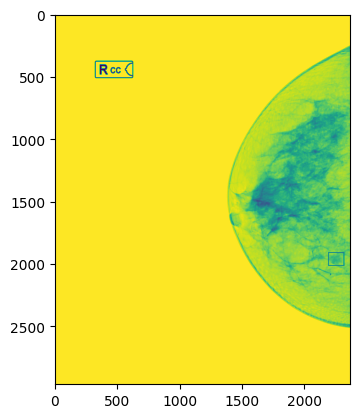

In [7]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

def draw_rectangle_and_render(image_path, coordinates):
    # Open an image file
    with Image.open(image_path) as img:
        # Create a drawing object
        draw = ImageDraw.Draw(img)
        # Draw the rectangle
        draw.rectangle(coordinates, outline="red", width=5)
        
        # Render the image
        plt.imshow(img)
        # plt.axis('off')  # Hide axes
        plt.show()
image=Image.open("pngVer/Kategori2Sag_11031_RCC.png")
x,y=image.size
draw_rectangle_and_render("pngVer/Kategori2Sag_11030_RCC.png", (1008.933+x/2, 426.8723+y/2, 1135.292+x/2, 534.0561+y/2))

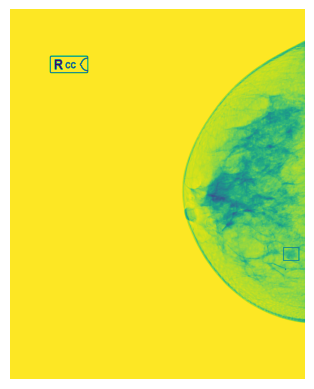

In [10]:
def draw_normalized_rectangle(image_path, rect_coords):
    # Open an existing image
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)
    img_width, img_height = image.size

    # Extract normalized rectangle parameters
    x_center_norm, y_center_norm, x_width_norm, y_width_norm = rect_coords

    # Convert normalized coordinates to absolute pixel values
    x_center = x_center_norm * img_width
    y_center = y_center_norm * img_height
    x_width = x_width_norm * img_width
    y_width = y_width_norm * img_height

    # Calculate the top-left and bottom-right coordinates of the rectangle
    left = x_center - (x_width)
    top = y_center - (y_width)
    right = x_center + (x_width)
    bottom = y_center + (y_width)

    # Draw the rectangle
    draw.rectangle([left, top, right, bottom], outline="red", width=5)

    # Render the image
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()

draw_normalized_rectangle("pngVer/Kategori2Sag_11030_RCC.png",(0.9535162859560068,0.6620999325236167,0.026725676818950914,0.018080937921727398))